In [53]:
import pandas as pd
import numpy as np 
import scipy.stats as stats 
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [54]:
a=np.array([[75, 78, 80, 81, 83],[70, 72, 73, 75, 77],[65, 68, 70, 72, 75],[ 80, 82, 84, 86, 88]])

In [55]:
group=np.repeat(np.arange(len(a)),5)

In [56]:
a.reshape(-1)

array([75, 78, 80, 81, 83, 70, 72, 73, 75, 77, 65, 68, 70, 72, 75, 80, 82,
       84, 86, 88])

In [70]:
df=pd.DataFrame({'group': group, 'value':a.reshape(-1)})

In [57]:
model=ols('value~C(group)',data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

          sum_sq    df         F    PR(>F)
C(group)   581.8   3.0  18.87429  0.000017
Residual   164.4  16.0       NaN       NaN


In [59]:
stats.f_oneway(*a)

F_onewayResult(statistic=18.874290348742903, pvalue=1.6617003131732233e-05)

In [49]:
import statsmodels.stats.multicomp as mc

In [52]:
a=mc.MultiComparison(df['value'],df['group'])
print(a.tukeyhsd())


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0      1     -6.0 0.0413 -11.8002 -0.1998   True
     0      2     -9.4 0.0014 -15.2002 -3.5998   True
     0      3      4.6 0.1472  -1.2002 10.4002  False
     1      2     -3.4 0.3669  -9.2002  2.4002  False
     1      3     10.6 0.0004   4.7998 16.4002   True
     2      3     14.0    0.0   8.1998 19.8002   True
-----------------------------------------------------


In [61]:
v=np.array([[3,1,8],[3,8,6],[3,9,10]])

In [62]:
stats.f_oneway(*v)

F_onewayResult(statistic=0.7425742574257427, pvalue=0.5150536699100567)

group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-6.0,0.0413,-11.8002,-0.1998,True
0,2,-9.4,0.0014,-15.2002,-3.5998,True
0,3,4.6,0.1472,-1.2002,10.4002,False
1,2,-3.4,0.3669,-9.2002,2.4002,False
1,3,10.6,0.0004,4.7998,16.4002,True
2,3,14.0,0.0,8.1998,19.8002,True


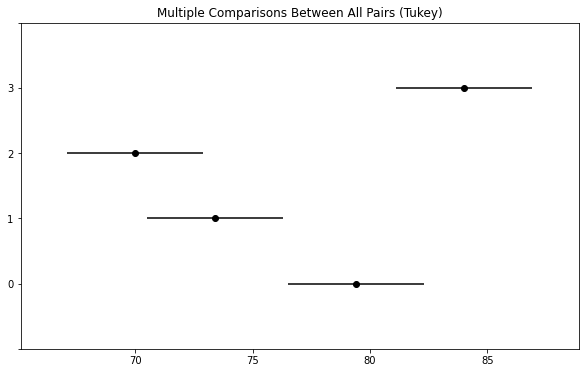

In [75]:
turkey=mc.pairwise_tukeyhsd(endog=df['value'],groups=df['group'])
turkey.plot_simultaneous()
turkey.summary()

#chi square distribution 

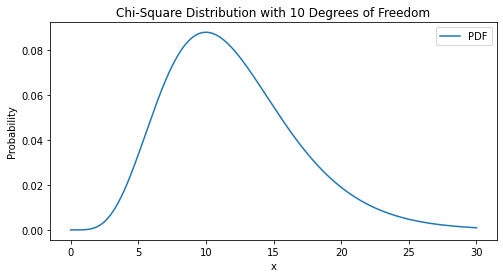

In [88]:
import matplotlib.pyplot as plt
df = 10  # degrees of freedom

x = np.linspace(0, 30, 500)  # range of x values

pdf = stats.chi2.pdf(x, 12)  # probability density function
cdf = stats.chi2.cdf(x, df)  # cumulative distribution function

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(x, pdf, label='PDF')
#ax.plot(x, cdf, label='CDF')

ax.set_xlabel('x')
ax.set_ylabel('Probability')
ax.set_title('Chi-Square Distribution with 10 Degrees of Freedom')
ax.legend()

plt.show()

In [90]:
observed = [32, 178, 290, 236, 64]

excepected=np.array([stats.binom.pmf(k=i,n=4,p=0.5) for i in range(5)])*sum(observed)

In [106]:
stats.chisquare(observed,excepected)

Power_divergenceResult(statistic=19.63333333333331, pvalue=0.0005898876209430525)

In [119]:
stats.chi2.cdf(((observed-excepected)**2/excepected).sum(),4)

0.999410112379057

In [123]:
statistic=((observed-excepected)**2/excepected).sum()

19.63333333333331

# test of independence 

In [124]:
observed = np.array([[1, 2, 0], [0, 1, 2], [1, 0, 0]])

In [129]:
row_sum=observed.sum(axis=1)
column_sum=observed.sum(axis=0)
total=observed.sum()

In [131]:
expected=(np.outer(row_sum,column_sum))/total

In [139]:
chi_statistics=((observed-expected)**2/expected).sum()

In [140]:
degree_of_freedom=(observed.shape[0]-1)*(observed.shape[1]-1)

In [144]:
p_value=1-stats.chi2.cdf(chi_statistics,degree_of_freedom)

In [146]:
print(p_value,chi_statistics)

0.1831558634495687 6.222222222222222


In [145]:
# second and simple method direct function 
stats.chi2_contingency(observed,excepected)

Chi2ContingencyResult(statistic=6.222222222222222, pvalue=0.1831558634495687, dof=4, expected_freq=array([[0.85714286, 1.28571429, 0.85714286],
       [0.85714286, 1.28571429, 0.85714286],
       [0.28571429, 0.42857143, 0.28571429]]))